In [ ]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv("non_sparse.csv")
df = df.drop("Unnamed: 0",axis = 1) 
display(df)

,Absolute Magnitude,orbit_id,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,ma,rms,Mean Motion,Minimum Orbit Intersection,Jupiter Tisserand Invariant,data_arc,class,pha
0,11.160,611,0.222589,10.827591,304.322163,642.995474,1.133419,178.816591,1.782461,271.071733,0.28397,0.559880,0.150505,4.583,46330.0,0.0,0.0
1,15.500,214,0.546558,11.567485,183.866950,1565.522356,1.196452,156.176338,4.080752,140.273422,0.39148,0.229955,0.203482,3.140,39593.0,0.0,0.0
2,13.800,311,0.570332,9.393852,110.434247,1421.113273,1.062886,350.495551,3.884588,294.579167,0.44039,0.253323,0.082217,3.221,37558.0,0.0,0.0
3,9.400,823,0.533046,26.677641,215.546828,1588.828164,1.244304,132.364633,4.085146,4.817744,0.38018,0.226582,0.344956,3.035,35105.0,0.0,0.0
4,17.700,104,0.435285,11.876540,171.327012,971.359460,1.083969,26.694788,2.755027,38.522411,0.45839,0.370615,0.107450,3.781,32328.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24179,21.000,2,0.546396,40.718996,84.647128,1495.383864,1.160859,17.034483,3.957525,351.405894,0.23911,0.240741,0.192704,2.924,7.0,0.0,0.0
24180,23.463,1,0.417971,25.603009,63.794186,853.955367,1.025263,12.696979,2.497806,356.724840,0.45779,0.421568,0.045436,3.907,10.0,0.0,0.0
24181,25.282,1,0.621031,10.873610,250.148666,1454.746549,0.952203,153.118442,4.073027,5.162592,0.43094,0.247466,0.005352,3.141,1.0,1.0,0.0
24182,21.967,1,0.399995,12.600106,129.455671,757.145564,0.975458,333.357399,2.276044,344.370686,0.26581,0.475470,0.018582,4.201,3.0,1.0,1.0


In [ ]:
df_norm = (df-df.mean(axis = 0))/(np.sqrt(df.var(axis = 0)))
df_array = df_norm.to_numpy()
df

,Absolute Magnitude,orbit_id,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,ma,rms,Mean Motion,Minimum Orbit Intersection,Jupiter Tisserand Invariant,data_arc,class,pha
0,11.160,611,0.222589,10.827591,304.322163,642.995474,1.133419,178.816591,1.782461,271.071733,0.28397,0.559880,0.150505,4.583,46330.0,0.0,0.0
1,15.500,214,0.546558,11.567485,183.866950,1565.522356,1.196452,156.176338,4.080752,140.273422,0.39148,0.229955,0.203482,3.140,39593.0,0.0,0.0
2,13.800,311,0.570332,9.393852,110.434247,1421.113273,1.062886,350.495551,3.884588,294.579167,0.44039,0.253323,0.082217,3.221,37558.0,0.0,0.0
3,9.400,823,0.533046,26.677641,215.546828,1588.828164,1.244304,132.364633,4.085146,4.817744,0.38018,0.226582,0.344956,3.035,35105.0,0.0,0.0
4,17.700,104,0.435285,11.876540,171.327012,971.359460,1.083969,26.694788,2.755027,38.522411,0.45839,0.370615,0.107450,3.781,32328.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24179,21.000,2,0.546396,40.718996,84.647128,1495.383864,1.160859,17.034483,3.957525,351.405894,0.23911,0.240741,0.192704,2.924,7.0,0.0,0.0
24180,23.463,1,0.417971,25.603009,63.794186,853.955367,1.025263,12.696979,2.497806,356.724840,0.45779,0.421568,0.045436,3.907,10.0,0.0,0.0
24181,25.282,1,0.621031,10.873610,250.148666,1454.746549,0.952203,153.118442,4.073027,5.162592,0.43094,0.247466,0.005352,3.141,1.0,1.0,0.0
24182,21.967,1,0.399995,12.600106,129.455671,757.145564,0.975458,333.357399,2.276044,344.370686,0.26581,0.475470,0.018582,4.201,3.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24184 entries, 0 to 24183
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           24184 non-null  float64
 1   orbit_id                     24184 non-null  int64  
 2   Eccentricity                 24184 non-null  float64
 3   Inclination                  24184 non-null  float64
 4   Asc Node Longitude           24184 non-null  float64
 5   Orbital Period               24184 non-null  float64
 6   Perihelion Distance          24184 non-null  float64
 7   Perihelion Arg               24184 non-null  float64
 8   Aphelion Dist                24184 non-null  float64
 9   ma                           24184 non-null  float64
 10  rms                          24184 non-null  float64
 11  Mean Motion                  24184 non-null  float64
 12  Minimum Orbit Intersection   24184 non-null  float64
 13  Jupiter Tisseran

In [ ]:
l2_calc = []
for i,x in enumerate(df):
  l2_calc.append(np.sum(i**2)/df.shape[1])
error_array = []
l2_norm = np.std(np.array(l2_calc))

for x in np.arange(1,17):
  pca = PCA(n_components=x)
  lower_dimension = pca.fit_transform(df_array)
  backtrack = pca.inverse_transform(lower_dimension)
  error = mean_squared_error(backtrack,df_array,)
  error_array.append(error)
  print("ERROR: "+"%.5f"%error)
  if error<0.01*l2_norm:
    print("Dimensions can be reduced {} as per to the above criteria ".format(x))

ERROR: 0.78952
ERROR: 0.64605
ERROR: 0.52531
ERROR: 0.42037
ERROR: 0.35219
ERROR: 0.28758
ERROR: 0.22711
ERROR: 0.16976
ERROR: 0.11715
ERROR: 0.06940
ERROR: 0.04347
Dimensions can be reduced 11 as per to the above criteria 
ERROR: 0.02812
Dimensions can be reduced 12 as per to the above criteria 
ERROR: 0.01429
Dimensions can be reduced 13 as per to the above criteria 
ERROR: 0.00384
Dimensions can be reduced 14 as per to the above criteria 
ERROR: 0.00057
Dimensions can be reduced 15 as per to the above criteria 
ERROR: 0.00009
Dimensions can be reduced 16 as per to the above criteria 


Text(0, 0.5, 'error')

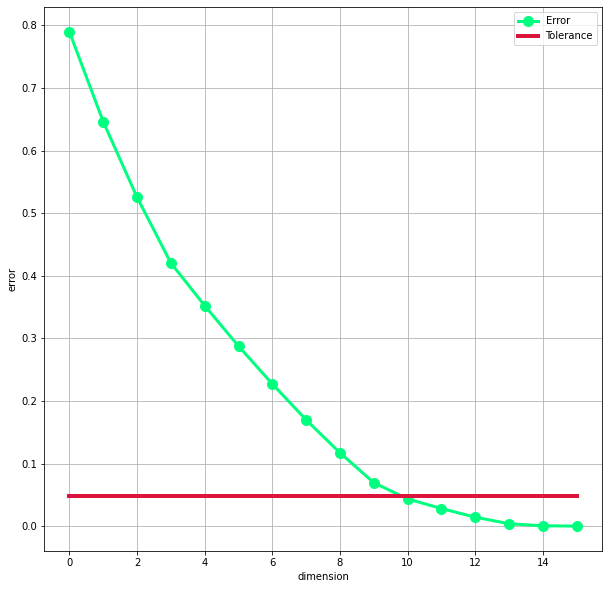

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0,16),error_array,linewidth = 3,marker ="o",markersize = 10,color="springgreen")
plt.grid()
plt.plot(np.arange(0,16),0.01*l2_norm*np.ones(16),color = "crimson",linewidth = 4)
plt.legend(["Error","Tolerance"])
plt.xlabel("dimension")
plt.ylabel("error")

In [ ]:
y = df["pha"].values
df2 = df.drop("pha",axis =1)
df2 = (df2-df2.mean(axis = 0))/(np.sqrt(df2.var(axis = 0)))
df2_array = df2.to_numpy()
X_train, X_test, y_train, y_test = train_test_split( df2_array, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (19347, 16) (19347,)
Test set: (4837, 16) (4837,)


In [ ]:
knn_stats = pd.DataFrame(columns = ['no_neighbours', "Test set acc","Train set acc"])
n_neigh = [1,3,5,10,20,50,100,200,500,1000,2000,5000,10000]
for n in n_neigh:
  neighbors = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
  y_hat = neighbors.predict(X_test)
  knn_stats = knn_stats.append({"no_neighbours":n,"Train set acc":metrics.accuracy_score(y_train, neighbors.predict(X_train)),
                                "Test set acc":metrics.accuracy_score(y_test, y_hat)},ignore_index = True)
knn_stats

,no_neighbours,Test set acc,Train set acc
0,1.0,0.931569,1.000000
1,3.0,0.938185,0.969763
2,5.0,0.941493,0.961544
3,10.0,0.937771,0.951155
4,20.0,0.940666,0.946865
5,50.0,0.934050,0.937148
6,100.0,0.931776,0.931049
7,200.0,0.925160,0.924950
8,500.0,0.917718,0.917041
9,1000.0,0.913790,0.912234


Text(0, 0.5, 'value')

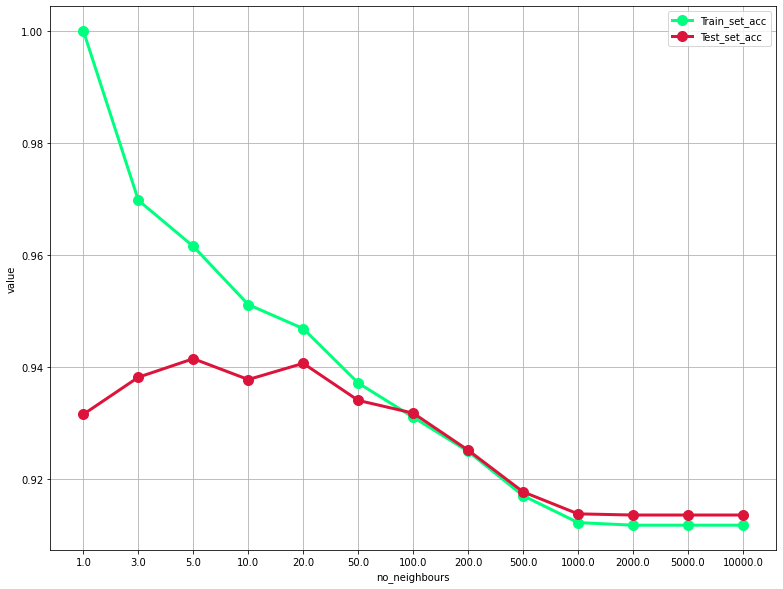

In [ ]:
fig = plt.figure(figsize=(13,10))
array = list(map(lambda x:str(x),knn_stats["no_neighbours"].tolist()))

plt.plot(array,knn_stats["Train set acc"],linewidth = 3,marker ="o",markersize = 10,color="springgreen")
plt.grid()
plt.plot(array,knn_stats["Test set acc"],color = "crimson",linewidth = 3,marker ="o",markersize = 10,)
plt.legend(["Train_set_acc","Test_set_acc"])
plt.xlabel("no_neighbours")
plt.ylabel("value")